# PCA and LDA

Note: Once you have done the assignment, run **Print** (File menu -> Print, or `Ctrl+P`) to generate a PDF and submit it via PandA.

----

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
m_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}
, \;
\Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}
\end{equation}
\begin{equation}
m_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}
, \;
\Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}
\end{equation}

## (1)

Show the scatter plot of bi-variate random numbers (2-d samples) generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).



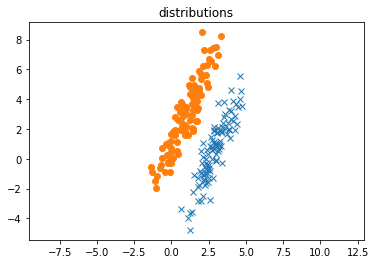

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m1 = [3, 1]
s1 = [[1, 2], [2, 5]]
m2 = [1, 3]
s2 = [[1, 2], [2, 5]]

N = 100

x1 = np.random.multivariate_normal(m1, s1, N)
x2 = np.random.multivariate_normal(m2, s2, N)

plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.axis('equal')
plt.title("distributions")
plt.show()

# (2)
Apply PCA to the 2-d samples `x1` and `x2` generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in function of PCA)


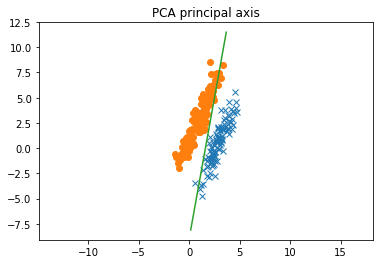

In [6]:
X=np.vstack((x1, x2))
forMean=np.ones((2*N,2*N))/(2*N)
M=np.dot(forMean,X)
#mean-zero
X_M=X-M
#varians estimated
S=np.dot(X_M.T,X_M)/(2*N)
#calculate eigen value/vector by svd
U, Sigma, V = np.linalg.svd(S)

#principal vector
u1=U[:,0].reshape(1,U.shape[0])
#line expression by parameter
t= np.arange(-10,10,0.1).reshape(200,1)
l1=np.dot(t,u1)+M[0]

plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.plot(l1[:,0],l1[:,1])
plt.axis('equal')
plt.title("PCA principal axis")
plt.show()

## (3)
Apply Fisher LDA to the 2-d samples  `x1` and `x2` generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA)

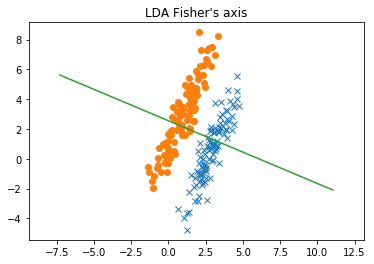

In [7]:
forMean=np.ones((N,N))/N
M1=np.dot(forMean,x1)
#mean-zero
X1_M1=x1-M1
#varians estimated
S1=np.dot(X1_M1.T,X1_M1)/N

M2=np.dot(forMean,x2)
#mean-zero
X2_M2=x2-M2
#varians estimated
S2=np.dot(X2_M2.T,X2_M2)/N

S_w=S1+S2

a=np.dot(np.linalg.inv(S_w),(M1[0]-M2[0]))
a=a/np.linalg.norm(a)
a=a[np.newaxis,:]

#line expression by parameter
t= np.arange(-10,10,0.1).reshape(200,1)
l=np.dot(t,a)+M[0]

plt.plot(x1[:,0], x1[:,1], 'x')
plt.plot(x2[:,0], x2[:,1], 'o')
plt.plot(l[:,0],l[:,1])
plt.axis('equal')
plt.title("LDA Fisher's axis")
plt.show()

## (4)
Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).

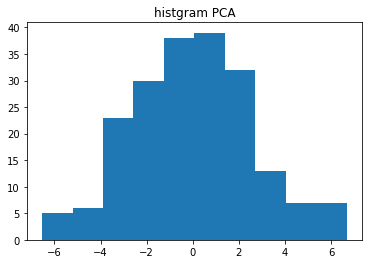

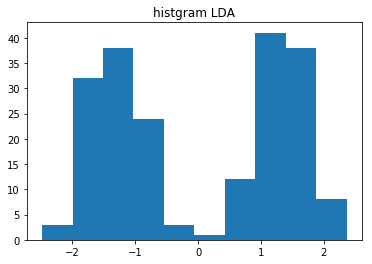

In [8]:
#distribution histgram from mean (PCA)
y_PCA=np.dot(X_M,u1.T)
plt.hist(y_PCA)
plt.title("histgram PCA")
plt.show()

#distribution histgram from mean (LDA)
y_LDA=np.dot(X_M,a.T)
plt.hist(y_LDA)
plt.title("histgram LDA")
plt.show()


## Discussions
Histgrams shows that the data projected  by the PCA principal axis have larger varince than by the LDA axis, so it is likely that the PCA ptrincipal axis can make the variance of the data almost maximumized. And histgram of PCA implies that the data projected to the principal axis obeys to Gaussian distributiion. Histgram of LDA implies that the data projected by the LDA axis is separated to the two kind of data from different two Gaussian distributions.

These axis lines in the data plot seems like a little leanig over or not enough. I think it is numerical error.